#Dataset Feature Extraction and Libraries

In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest

import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras import models

In [112]:
df = pd.read_csv('/content/government-procurement-via-gebiz.csv')

In [113]:
df

,tender_no.,tender_description,agency,award_date,tender_detail_status,supplier_name,awarded_amt
0,ACR000ETT14000007,Provision Of Event Management And Related Serv...,Accounting And Corporate Regulatory Authority,6/2/2015,Awarded to No Suppliers,Unknown,0.00
1,ACR000ETT14000008,Invitation To Tender For The Provision Of Alte...,Accounting And Corporate Regulatory Authority,30/4/2015,Awarded to No Suppliers,Unknown,0.00
2,ACR000ETT14000009,Invitation To Tender For The Provision Of Manp...,Accounting And Corporate Regulatory Authority,28/1/2015,Awarded to Suppliers,RMA CONTRACTS PTE. LTD.,76071.21
3,ACR000ETT15000004,Invitation To Tender For The Provision Of Manp...,Accounting And Corporate Regulatory Authority,1/7/2015,Awarded to Suppliers,TESCOM (SINGAPORE) SOFTWARE SYSTEMS TESTING PT...,84000.00
4,ACR000ETT15000005,Proposed Interior Fitting Out Works for ACRA's...,Accounting And Corporate Regulatory Authority,24/4/2015,Awarded to Suppliers,MKS GLOBAL PTE. LTD.,653255.00
...,...,...,...,...,...,...,...
32751,WSG000ETT20300008,PROVISION OF INTEGRATED FACILITIES MANAGEMENT ...,Workforce Singapore,9/12/2020,Awarded to Suppliers,GUTHRIE FMC PTE. LTD.,4269564.00
32752,WSG000ETT20300010,INVITATION TO TENDER FOR RENEWAL OF SOFTWARE M...,Workforce Singapore,10/12/2020,Awarded to Suppliers,SQLNET PTE. LTD.,534800.00
32753,WSG000ETT20300011,SGUnited Jobs and Skills Placement Partners,Workforce Singapore,5/3/2021,Awarded to Suppliers,ADECCO PERSONNEL PTE LTD,1550.00
32754,WSG000ETT20300012,JOB EVALUATION EXERCISE AND COMPENSATION REVIEW,Workforce Singapore,5/2/2021,Awarded to Suppliers,CARROTS CONSULTING PTE LTD,70000.00


In [114]:
df.tail()

,tender_no.,tender_description,agency,award_date,tender_detail_status,supplier_name,awarded_amt
32751,WSG000ETT20300008,PROVISION OF INTEGRATED FACILITIES MANAGEMENT ...,Workforce Singapore,9/12/2020,Awarded to Suppliers,GUTHRIE FMC PTE. LTD.,4269564.0
32752,WSG000ETT20300010,INVITATION TO TENDER FOR RENEWAL OF SOFTWARE M...,Workforce Singapore,10/12/2020,Awarded to Suppliers,SQLNET PTE. LTD.,534800.0
32753,WSG000ETT20300011,SGUnited Jobs and Skills Placement Partners,Workforce Singapore,5/3/2021,Awarded to Suppliers,ADECCO PERSONNEL PTE LTD,1550.0
32754,WSG000ETT20300012,JOB EVALUATION EXERCISE AND COMPENSATION REVIEW,Workforce Singapore,5/2/2021,Awarded to Suppliers,CARROTS CONSULTING PTE LTD,70000.0
32755,WSG000ETT20300013,PROVISION OF APPLICATION MAINTENANCE (AGILE) A...,Workforce Singapore,10/2/2021,Awarded to Suppliers,PLEODATA PTE. LTD.,491049.0


In [115]:
df.shape

(32756, 7)

#EDA

In [116]:
df.describe()

,awarded_amt
count,3.275600e+04
mean,3.942861e+06
std,3.415095e+07
min,0.000000e+00
25%,1.800075e+04
50%,1.649915e+05
75%,7.047750e+05
max,1.988000e+09


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32756 entries, 0 to 32755
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tender_no.            32756 non-null  object 
 1   tender_description    32756 non-null  object 
 2   agency                32756 non-null  object 
 3   award_date            32756 non-null  object 
 4   tender_detail_status  32756 non-null  object 
 5   supplier_name         32756 non-null  object 
 6   awarded_amt           32756 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.7+ MB


In [118]:
df.isnull().sum()

,0
tender_no.,0
tender_description,0
agency,0
award_date,0
tender_detail_status,0
supplier_name,0
awarded_amt,0


In [119]:
df['supplier_name'].value_counts()

,count
supplier_name,
Unknown,1414
NCS PTE. LTD.,284
SURBANA JURONG CONSULTANTS PTE. LTD.,148
KPMG SERVICES PTE. LTD.,137
ERNST & YOUNG ADVISORY PTE. LTD.,120
...,...
CELLARMASTER WINES SINGAPORE PTE LTD,1
JURONG DISTRICENTRE PTE LTD,1
APP CONTENT & CONCEPTS PTE. LTD.,1


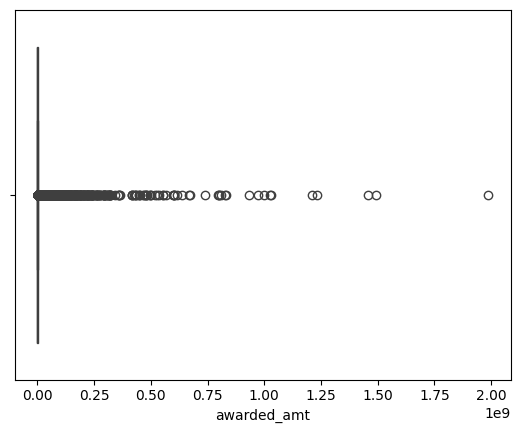

In [120]:
sns.boxplot(x=df["awarded_amt"])
plt.show()

#Preprocessing

In [121]:
df["award_date"] = pd.to_datetime(df["award_date"], errors="coerce")

In [122]:
#Removing Negatives
df = df[df["awarded_amt"] > 0]

In [123]:
#Filling Missing Values
df["supplier_name"] = df["supplier_name"].fillna("UNKNOWN")
df["agency"] = df["agency"].fillna("UNKNOWN")

/tmp/ipython-input-752421331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["supplier_name"] = df["supplier_name"].fillna("UNKNOWN")
/tmp/ipython-input-752421331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["agency"] = df["agency"].fillna("UNKNOWN")


Contract value features

In [124]:
df["log_amount"] = np.log1p(df["awarded_amt"])

/tmp/ipython-input-287157280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_amount"] = np.log1p(df["awarded_amt"])


Supplier Risk Features

In [125]:
supplier_stats = df.groupby("supplier_name")["awarded_amt"].agg(["mean", "count"]).reset_index()
supplier_stats.columns = ["supplier_name", "supplier_avg_amt", "supplier_contract_count"]

df = df.merge(supplier_stats, on="supplier_name", how="left")

Agency Risk Features

In [126]:
agency_stats = df.groupby("agency")["awarded_amt"].agg(["mean", "count"]).reset_index()
agency_stats.columns = ["agency", "agency_avg_amt", "agency_contract_count"]

df = df.merge(agency_stats, on="agency", how="left")

Time Features

In [127]:
df["year"] = df["award_date"].dt.year
df["month"] = df["award_date"].dt.month
df["day"] = df["award_date"].dt.day

In [128]:
features = [
    "awarded_amt",
    "log_amount",
    "supplier_avg_amt",
    "supplier_contract_count",
    "agency_avg_amt",
    "agency_contract_count",
    "year",
    "month"
]

X = df[features].fillna(0)

In [129]:
X.head()

,awarded_amt,log_amount,supplier_avg_amt,supplier_contract_count,agency_avg_amt,agency_contract_count,year,month
0,76071.21,11.239438,9.172780e+05,50,1.507252e+06,36,0.0,0.0
1,84000.00,11.338584,2.009125e+05,4,1.507252e+06,36,2015.0,1.0
2,653255.00,13.389724,3.405775e+05,2,1.507252e+06,36,0.0,0.0
3,87690.00,11.381575,1.344532e+06,33,1.507252e+06,36,0.0,0.0
4,392000.00,12.879020,3.920000e+05,1,1.507252e+06,36,0.0,0.0


<Axes: xlabel='agency_avg_amt', ylabel='supplier_avg_amt'>

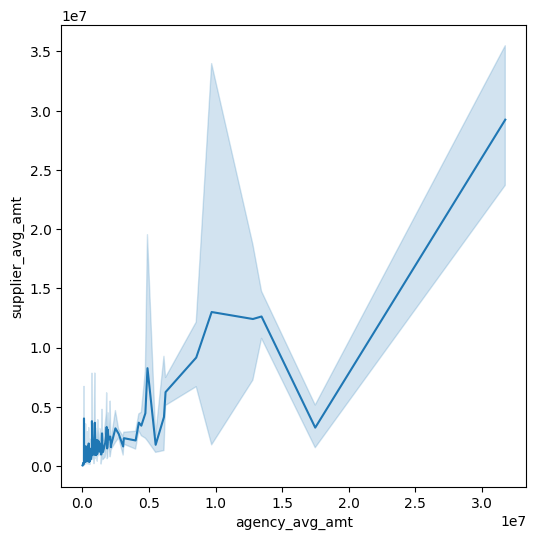

In [130]:
plt.figure(figsize=(6,6))
sns.lineplot(x= X['agency_avg_amt'],y=X['supplier_avg_amt'])

#Model Training

Data Scaling

In [131]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [132]:
model = IsolationForest(
    n_estimators = 300,
    contamination='auto',
    random_state=42
)

In [133]:
model.fit(X_scaled)

IsolationForest(n_estimators=300, random_state=42)

In [134]:
df["if_score"] = -model.score_samples(X_scaled)

In [135]:
df["if_pred"] = model.predict(X_scaled)

#AutoEncoder

In [136]:
X_scaled

array([[-0.11651618, -0.01998568, -0.1084272 , ..., -1.3348806 ,
        -0.77582855, -0.64799154],
       [-0.11629016,  0.00488173, -0.13235541, ..., -1.3348806 ,
         1.28654695, -0.38805587],
       [-0.10006252,  0.51934233, -0.12769029, ..., -1.3348806 ,
        -0.77582855, -0.64799154],
       ...,
       [-0.11864054, -0.99636135, -0.13586623, ..., -1.21695934,
         1.29268802,  0.65168683],
       [-0.11668925, -0.040847  , -0.13672818, ..., -1.21695934,
         1.29268802,  0.65168683],
       [-0.1046865 ,  0.4477534 , -0.12946781, ..., -1.21695934,
         1.29268802,  1.9513652 ]])

In [137]:
input_dim = X_scaled.shape[1]

In [138]:
input_layer = layers.Input(shape=(input_dim,))

Encoder

In [139]:
encoded = layers.Dense(32, activation="relu")(input_layer)
encoded = layers.Dense(16, activation="relu")(encoded)

Decoder

In [140]:
decoded = layers.Dense(32, activation="relu")(encoded)
decoded = layers.Dense(input_dim, activation=None)(decoded)

In [141]:
autoencoder = models.Model(input_layer, decoded)

In [142]:
autoencoder.compile(
    optimizer="adam",
    loss="mse"
)

AE Training

In [143]:
history = autoencoder.fit(
    X_scaled, X_scaled,
    epochs=30,
    batch_size=64,
    shuffle=True,
    validation_split=0.1,
    verbose=1
)

Epoch 1/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4492 - val_loss: 0.0295
Epoch 2/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0189 - val_loss: 0.0092
Epoch 3/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 4/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 5/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 6/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0029 - val_loss: 0.0046
Epoch 7/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0030 - val_loss: 0.0044
Epoch 8/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 9/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 10/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 11/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 12/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Error Calc

In [144]:
reconstructions = autoencoder.predict(X_scaled)

reconstruction_error = np.mean(
    np.square(X_scaled - reconstructions), axis=1
)

df["ae_score"] = reconstruction_error

970/970 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


#Score Calculation

In [147]:
scaler = MinMaxScaler()

df[["if_score_norm", "ae_score_norm"]] = scaler.fit_transform(
    df[["if_score", "ae_score"]]
)

In [148]:
df["fraud_score"] = (
    0.6 * df["if_score_norm"] +
    0.4 * df["ae_score_norm"]
)

In [149]:
alerts = df.sort_values("fraud_score", ascending=False).head(20)

In [150]:
def risk_label(score):
    if score > 0.8:
        return "HIGH"
    elif score > 0.5:
        return "MEDIUM"
    else:
        return "LOW"

In [151]:
df["risk_level"] = df["fraud_score"].apply(risk_label)

In [155]:
df.head()

,tender_no.,tender_description,agency,award_date,tender_detail_status,supplier_name,awarded_amt,log_amount,supplier_avg_amt,supplier_contract_count,...,year,month,day,if_score,if_pred,ae_score,if_score_norm,ae_score_norm,fraud_score,risk_level
0,ACR000ETT14000009,Invitation To Tender For The Provision Of Manp...,Accounting And Corporate Regulatory Authority,NaT,Awarded to Suppliers,RMA CONTRACTS PTE. LTD.,76071.21,11.239438,9.172780e+05,50,...,NaN,NaN,NaN,0.419801,1,0.000136,0.163621,0.000100,0.098212,LOW
1,ACR000ETT15000004,Invitation To Tender For The Provision Of Manp...,Accounting And Corporate Regulatory Authority,2015-01-07,Awarded to Suppliers,TESCOM (SINGAPORE) SOFTWARE SYSTEMS TESTING PT...,84000.00,11.338584,2.009125e+05,4,...,2015.0,1.0,7.0,0.447511,1,0.000059,0.230351,0.000040,0.138227,LOW
2,ACR000ETT15000005,Proposed Interior Fitting Out Works for ACRA's...,Accounting And Corporate Regulatory Authority,NaT,Awarded to Suppliers,MKS GLOBAL PTE. LTD.,653255.00,13.389724,3.405775e+05,2,...,NaN,NaN,NaN,0.389738,1,0.000067,0.091224,0.000046,0.054753,LOW
3,ACR000ETT15000006,Provision Of Smart Card Access Control System ...,Accounting And Corporate Regulatory Authority,NaT,Awarded to Suppliers,CERTIS TECHNOLOGY (SINGAPORE) PTE. LTD.,87690.00,11.381575,1.344532e+06,33,...,NaN,NaN,NaN,0.405664,1,0.000122,0.129575,0.000088,0.077781,LOW
4,ACR000ETT15000009,Invitation to tender for the provision of serv...,Accounting And Corporate Regulatory Authority,NaT,Awarded to Suppliers,RHT COMPLIANCE SOLUTIONS PTE. LTD.,392000.00,12.879020,3.920000e+05,1,...,NaN,NaN,NaN,0.387465,1,0.000053,0.085749,0.000036,0.051464,LOW


In [156]:
df.tail()

,tender_no.,tender_description,agency,award_date,tender_detail_status,supplier_name,awarded_amt,log_amount,supplier_avg_amt,supplier_contract_count,...,year,month,day,if_score,if_pred,ae_score,if_score_norm,ae_score_norm,fraud_score,risk_level
31016,WSG000ETT20300008,PROVISION OF INTEGRATED FACILITIES MANAGEMENT ...,Workforce Singapore,2020-09-12,Awarded to Suppliers,GUTHRIE FMC PTE. LTD.,4269564.0,15.267023,1.959903e+06,16,...,2020.0,9.0,12.0,0.500518,-1,0.000274,0.358001,0.000205,0.214883,LOW
31017,WSG000ETT20300010,INVITATION TO TENDER FOR RENEWAL OF SOFTWARE M...,Workforce Singapore,2020-10-12,Awarded to Suppliers,SQLNET PTE. LTD.,534800.0,13.189650,2.359447e+06,2,...,2020.0,10.0,12.0,0.472518,1,0.000161,0.290572,0.000118,0.174391,LOW
31018,WSG000ETT20300011,SGUnited Jobs and Skills Placement Partners,Workforce Singapore,2021-05-03,Awarded to Suppliers,ADECCO PERSONNEL PTE LTD,1550.0,7.346655,9.580500e+04,6,...,2021.0,5.0,3.0,0.467648,1,0.000140,0.278844,0.000102,0.167347,LOW
31019,WSG000ETT20300012,JOB EVALUATION EXERCISE AND COMPENSATION REVIEW,Workforce Singapore,2021-05-02,Awarded to Suppliers,CARROTS CONSULTING PTE LTD,70000.0,11.156265,7.000000e+04,1,...,2021.0,5.0,2.0,0.451023,1,0.000152,0.238808,0.000112,0.143330,LOW
31020,WSG000ETT20300013,PROVISION OF APPLICATION MAINTENANCE (AGILE) A...,Workforce Singapore,2021-10-02,Awarded to Suppliers,PLEODATA PTE. LTD.,491049.0,13.104301,2.873617e+05,3,...,2021.0,10.0,2.0,0.477514,1,0.000185,0.302603,0.000137,0.181617,LOW
